In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from src.models import GPT, GPTConfig
import torch
from src.dataset import tokenize_str, decode_tokens

In [2]:
log_path = '../log/log.txt'

iters = []
train_losses = []
val_iters = []
val_losses = []
hellaswag_iters = []
hellaswag_accuracies = []

with open(log_path, 'r') as file:
    for line in file:
        if 'train loss' in line:
            parts = line.strip().split('|')
            iter_num = int(parts[1].strip().split()[1])
            loss = float(parts[2].strip().split()[2])
            iters.append(iter_num)
            train_losses.append(loss)
        elif 'validation loss' in line:
            parts = line.strip().split('|')
            iter_num = int(parts[1].strip().split()[1])
            loss = float(parts[2].strip().split()[2])
            val_iters.append(iter_num)
            val_losses.append(loss)
        elif 'Hellaswag accuracy' in line:
            parts = line.strip().split('|')
            iter_num = int(parts[1].strip().split()[1])
            accuracy = float(parts[2].strip().split()[2])
            hellaswag_iters.append(iter_num)
            hellaswag_accuracies.append(accuracy)

In [3]:
gpt2_checkpoint_accuracy = 0.294463
gpt2_checkpoint_val_loss = 3.2924


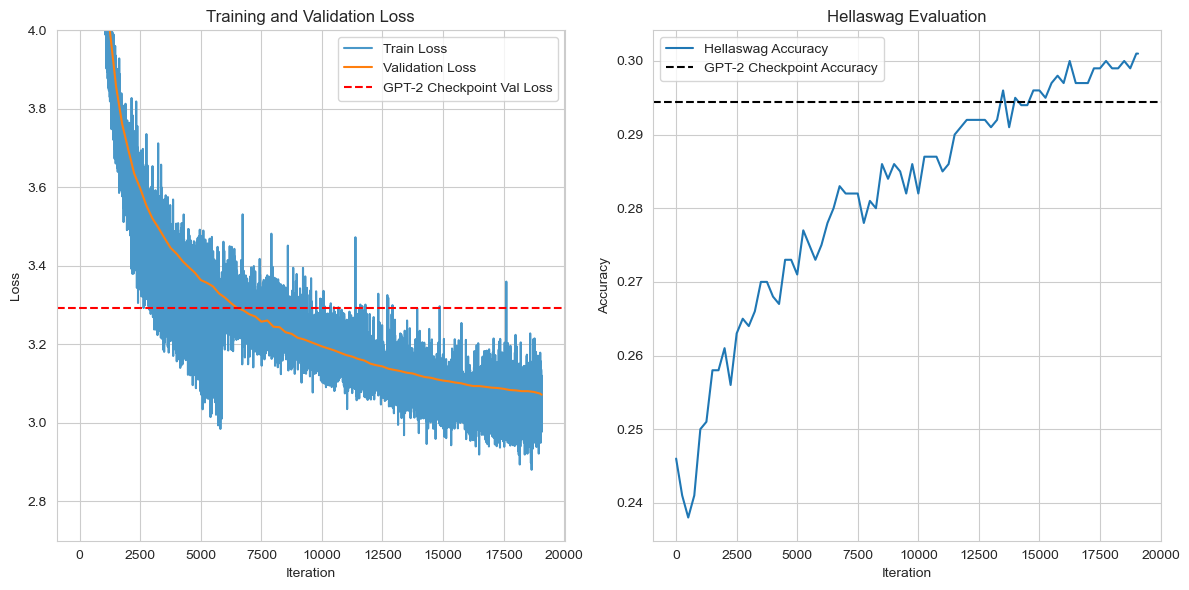

In [4]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(iters, train_losses, color=plt.get_cmap('Blues')(0.6), label='Train Loss', zorder=1)
plt.plot(val_iters, val_losses, color=plt.get_cmap('tab10')(1), label='Validation Loss', zorder=2)  # Validation as line
plt.axhline(y=gpt2_checkpoint_val_loss, color='red', linestyle='--', label='GPT-2 Checkpoint Val Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.ylim(2.7, 4) 
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hellaswag_iters, hellaswag_accuracies, label='Hellaswag Accuracy')  # No marker
plt.axhline(y=gpt2_checkpoint_accuracy, color='black', linestyle='--', label='GPT-2 Checkpoint Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Hellaswag Evaluation')
plt.legend()

plt.tight_layout()
plt.savefig('../log/fig.PNG')
plt.show()


In [5]:
model = GPT(GPTConfig(vocab_size=50304))

In [6]:
idx = tokenize_str("On a clear day")
generated = model.generate(idx, 25)
gen_str = decode_tokens(generated)
print(f"{gen_str}")

On a clear day indis DNSヘラ ignore Happ Ce Croatian mugVAavorable303 wayomb prom bartender surmia pass standingotoshanMore intensely Lent loaf


In [7]:
checkpoint = torch.load("../log/model_epoch0_iter19072.pt", map_location=torch.device('cpu'))

In [8]:
model.load_state_dict(checkpoint['model'])

<All keys matched successfully>

In [9]:
idx = tokenize_str("On a clear day")
generated = model.generate(idx, 25)
gen_str = decode_tokens(generated)
print(f"{gen_str}")

On a clear day, our community is growing and we are enjoying the beauty and tranquility of our natural surroundings. While it may not be a
